<a href="https://colab.research.google.com/github/Forger-888/Midterms/blob/main/Ho_Wei_Rui_Quiz_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [54]:
%%verilog

module decade_counter (
    input wire clk,
    input wire rst,
    output reg [4:0] count,
    output reg [4:0] ten
);
    // Initialize count and ten to Begin with 0
    initial begin
        count = 5'b00000;
        ten = 5'b00000;
    end

    always @(posedge clk or negedge rst) begin
        if (!rst) begin
            count <= 5'b00010; // Count value is reset to 2
            ten <= 5'b00010;   // Ten value is reset to 2
        end
        else begin
            if (count == 5'b10011) begin // When count reaches 19 (5'b10011)
                count <= 5'b00000; // Reset count to 0
            end

            else begin
                count <= count + 1; // Normal counting
            end

            // ten = count - 2 only when count == 19 (5'b10011), otherwise it is 0

            if (count == 5'b10011) begin
                ten <= count - 5'b00010;
            end else begin
                ten <= 5'b00000;
            end
        end
    end

endmodule

module testbench;
    reg clk, rst;
    wire [4:0] count, ten;

    // Instantiate the module
    decade_counter uut (
        .clk(clk),
        .rst(rst),
        .count(count),
        .ten(ten)
    );

    // Clock generation (Period: 2 time units)
    always #1 clk = ~clk;

    initial begin
        // Initialize signals
        clk = 0;
        rst = 1;  // Start without reset active

        #20 rst = 0;  // Activate Reset
        #2 rst = 1;   // deactivate Reset

        // Allow the circuit to run for at least 2 complete count cycles
        #100 $finish;
    end

    // Monitor when count reaches 19
    always @(posedge clk) begin
        if (count == 5'b10011) begin
            $display("At time %t: count = %d, ten = %d", $time, count, ten);
        end
    end

    // Dump waveform for visualization
    initial begin
        $dumpfile("waveform.vcd");
        $dumpvars(0, testbench);
    end

endmodule


VCD info: dumpfile waveform.vcd opened for output.
At time                   57: count = 19, ten =  0
At time                   97: count = 19, ten =  0



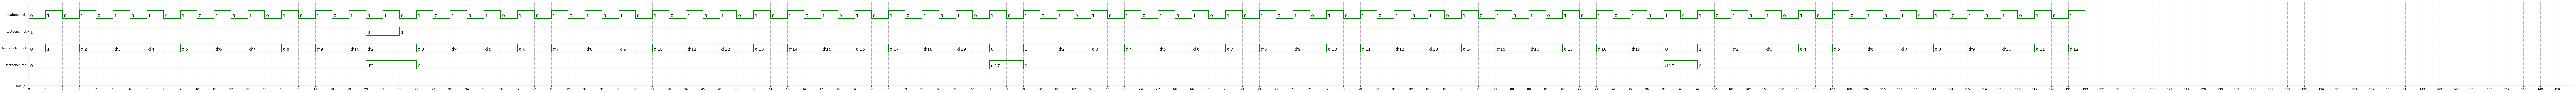

In [55]:
%%waveform waveform.vcd
sign_list= ["testbench.clk","testbench.rst","testbench.count","testbench.ten"]
time_begin = 0
time_end = 150
base = 'dec'